<a href="https://colab.research.google.com/github/cirojunior/agregacaopandas/blob/master/Agrupamento_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Carregando o arquivo csv do meu dataset para ser manipulado**

In [ ]:
import glob
from google.colab import files

uploaded = files.upload()

extensao = 'csv'
arquivos_csv = [i for i in glob.glob('*.{}'.format(extensao))]
concatenado = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv ])

Saving modelo carros.csv to modelo carros.csv


### **Carregando os dados do CSV e imprimindo**

In [ ]:
import pandas as pd

dados = pd.read_csv('modelo carros.csv',sep=';')

print(dados)

      Ano  Código Modelo  Mês  Quantidade   AnoMes  Valor
0    2018    1010  Creta    1        2875   1.2018  65155
1    2018    1010  Creta    2        3070   2.2018  65155
2    2018    1010  Creta    3        3671   3.2018  65155
3    2018    1010  Creta    4        3785   4.2018  65155
4    2018    1010  Creta    5        3841   5.2018  65155
..    ...     ...    ...  ...         ...      ...    ...
355  2017    1021     T5    8         238   8.2017  49469
356  2017    1021     T5    9         128   9.2017  49469
357  2017    1021     T5   10         125  10.2017  49469
358  2017    1021     T5   11          88  11.2017  49469
359  2017    1021     T5   12         129  12.2017  49469

[360 rows x 7 columns]


### **Agrupando os dados por modelo e imprimindo para ver o agrupamento**

           Quantidade
Modelo               
Renegade       153440
Creta          148082
HR-V           145234
Kicks          136355
EcoSport        99900
Captur          68911
Duster          67465
Tracker         54573
T-Cross         37090
2008            20317
C4 Cactus       19739
T5               2152
AxesSubplot(0.125,0.125;0.775x0.755)


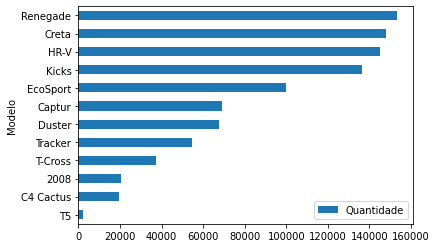

In [ ]:
grouped = dados[['Quantidade']].groupby(dados['Modelo'])
agrupado = pd.DataFrame(grouped.sum())

print(agrupado.sort_values(['Quantidade'],ascending=False))

print(agrupado.sort_values(['Quantidade'],ascending=True).plot.barh())

### **Identificando os produtos da "curva A" e do "mix" e imprimindo para análise**

In [ ]:
def validando_grupo(qtde):

    if qtde >= 100000:
        return 'Curva A'
    else:
        return ' Mix'

agrupado['Grupo_produtos'] = agrupado['Quantidade'].apply(validando_grupo)

print(agrupado.sort_values(['Quantidade'],ascending=False))

           Quantidade Grupo_produtos
Modelo                              
Renegade       153440        Curva A
Creta          148082        Curva A
HR-V           145234        Curva A
Kicks          136355        Curva A
EcoSport        99900            Mix
Captur          68911            Mix
Duster          67465            Mix
Tracker         54573            Mix
T-Cross         37090            Mix
2008            20317            Mix
C4 Cactus       19739            Mix
T5               2152            Mix


### **Agrupando os produtos por Grupo de produtos e imprimindo para ver o resultado**

                Quantidade
Grupo_produtos            
Curva A             583111
 Mix                370147
AxesSubplot(0.125,0.125;0.775x0.755)


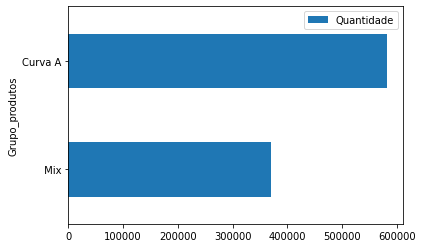

In [ ]:
grouped = agrupado[['Quantidade']].groupby(agrupado['Grupo_produtos'])
agrupado = grouped.sum()

print(agrupado.sort_values(['Quantidade'],ascending=False))

print(agrupado.sort_values(['Quantidade'],ascending=True).plot.barh())